In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':'1OPCe97JJW5e5n2TD8NayoSlb8xjQkj62'})
downloaded.GetContentFile('bank-marketing.csv')

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [0]:
bank2 = pd.read_csv("bank-marketing.csv")

In [302]:
bank2.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [303]:
bank2.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

In [304]:
bank2['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [305]:
bank2['pdays'].median()

-1.0

there is the mean and median will be different because there are the most of value in the -1 and but pdays is not negative value there are certain days with different value mean and median 

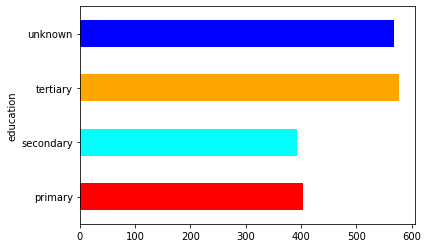

In [306]:
bank2.groupby('education')['balance'].median().plot.barh(color=['red','cyan','orange','blue'])
plt.show()

In [307]:
bank2.groupby('education')['balance'].median()

education
primary      403
secondary    392
tertiary     577
unknown      568
Name: balance, dtype: int64

there are different type of the education level there is maximum group of median is tertiary and second is unknown 

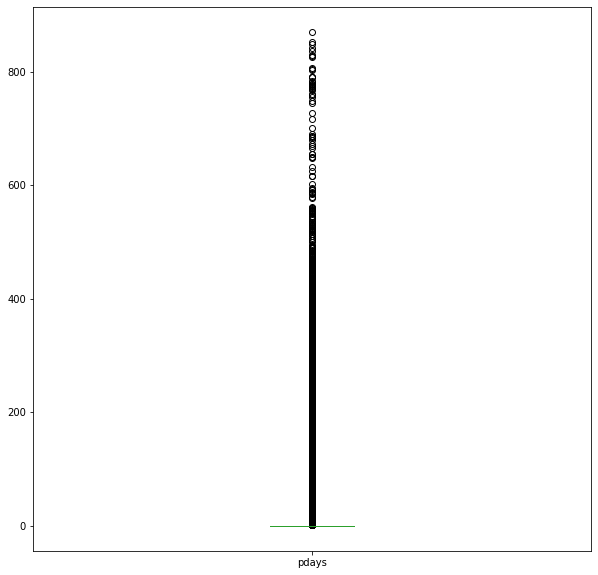

In [308]:
plt.figure(figsize=(10, 10))
bank2.pdays.plot.box()
plt.show()

there are the outlier in pdays above 600 is outliers .

### perform bi-variate analysis to identify the features that are directly associated with the target variable.



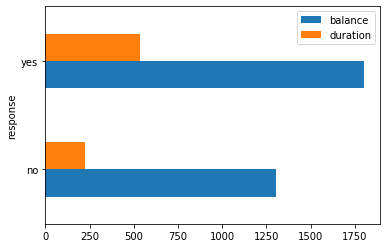

In [309]:
bank2.groupby(['response'])['balance','duration'].mean().plot.barh()
plt.show()

there are the most of time is reponse is only for balace is save in account that is maxmium value for the yes balance .

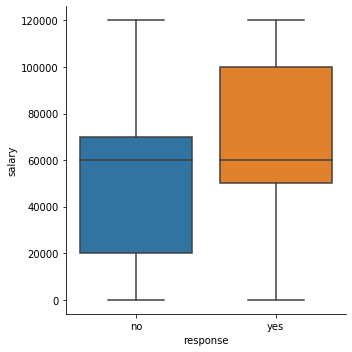

In [310]:
sns.catplot(x='response',y = 'salary', kind = 'box',data=bank2)
plt.show()


there are reponse is maximum there is salary like that response is yes then salary is maximum .reponse is no then salary is minimum .

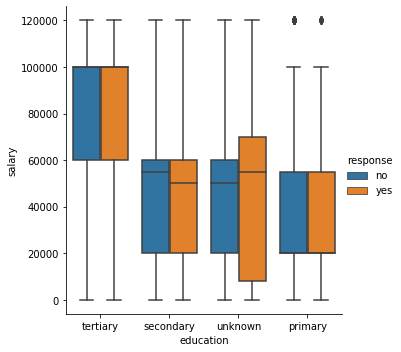

In [311]:
sns.catplot(x = 'education',y = 'salary',hue ='response',kind = 'box',data = bank2)
plt.show()

there are the different type of the education and response dependent on the salary there tertiary education maximum salary is response is yes or no 

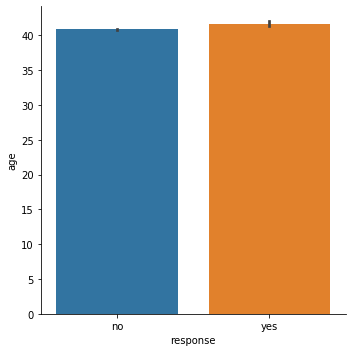

In [312]:
sns.catplot(x = 'response',y='age',kind = 'bar',data=bank2)
plt.show()

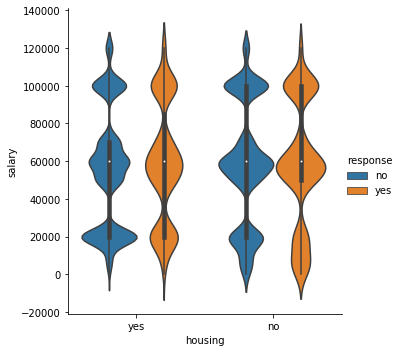

In [313]:
sns.catplot(x = 'housing',y='salary' , hue='response',kind='violin',data = bank2 )
plt.show()

there is reponse for the maximum housing there is customer salary is maximum to get reponse is yes . maximum is yes for housing loan.

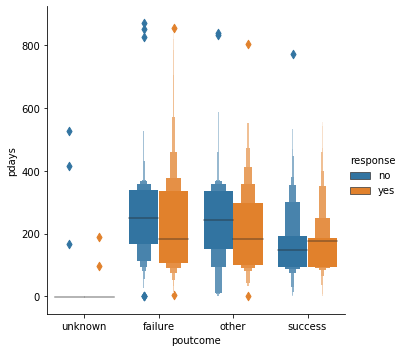

In [314]:
sns.catplot(x='poutcome',y='pdays',hue = 'response',kind = 'boxen',data=bank2)
plt.show()

### Convert the response variable to a convenient form

In [0]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [0]:
bank2['response']=label_encoder.fit_transform(bank2['response'])

In [317]:
bank2.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


### Make suitable plots for associations with numerical features and categorical features’

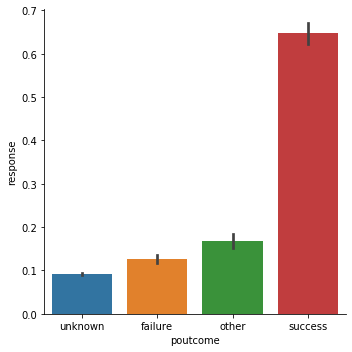

In [318]:
sns.catplot(x = 'poutcome' ,y='response',kind = 'bar',data=bank2)
plt.show()

there are different type of poutcome but success is maximum value of response  


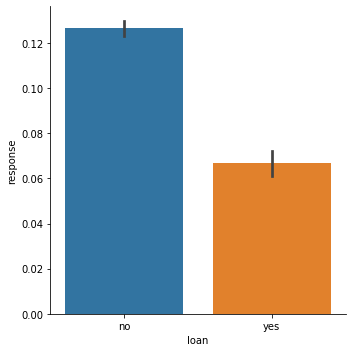

In [319]:
sns.catplot(x = 'loan',y='response',kind ='bar',data=bank2)
plt.show()

there is maximum time response is no loan approved 

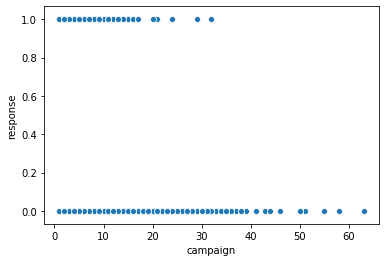

In [320]:
sns.scatterplot(x ='campaign',y='response',data=bank2)
plt.show()

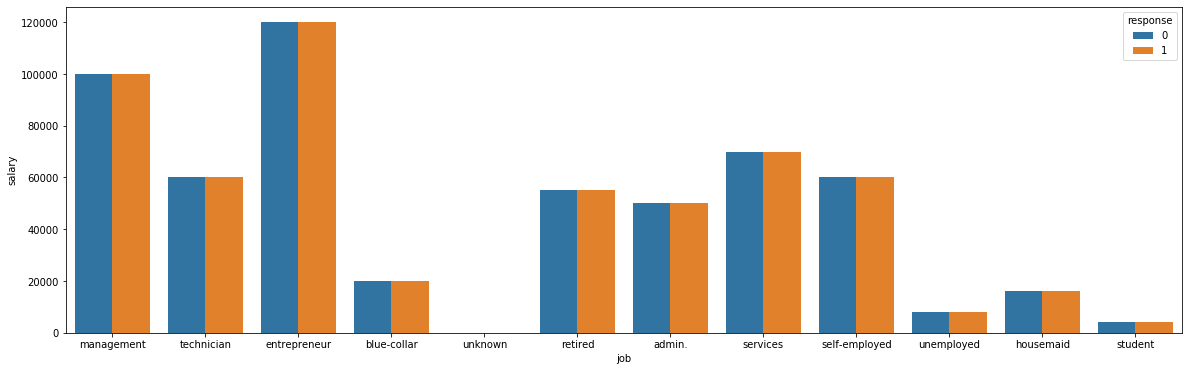

In [321]:
plt.figure(figsize=(20, 6))
sns.barplot(x = 'job',y='salary',hue='response',data=bank2)
plt.show()

there are different type of jobs and maximum response is entreprenur is gets the loan maximum because of maximum salary .

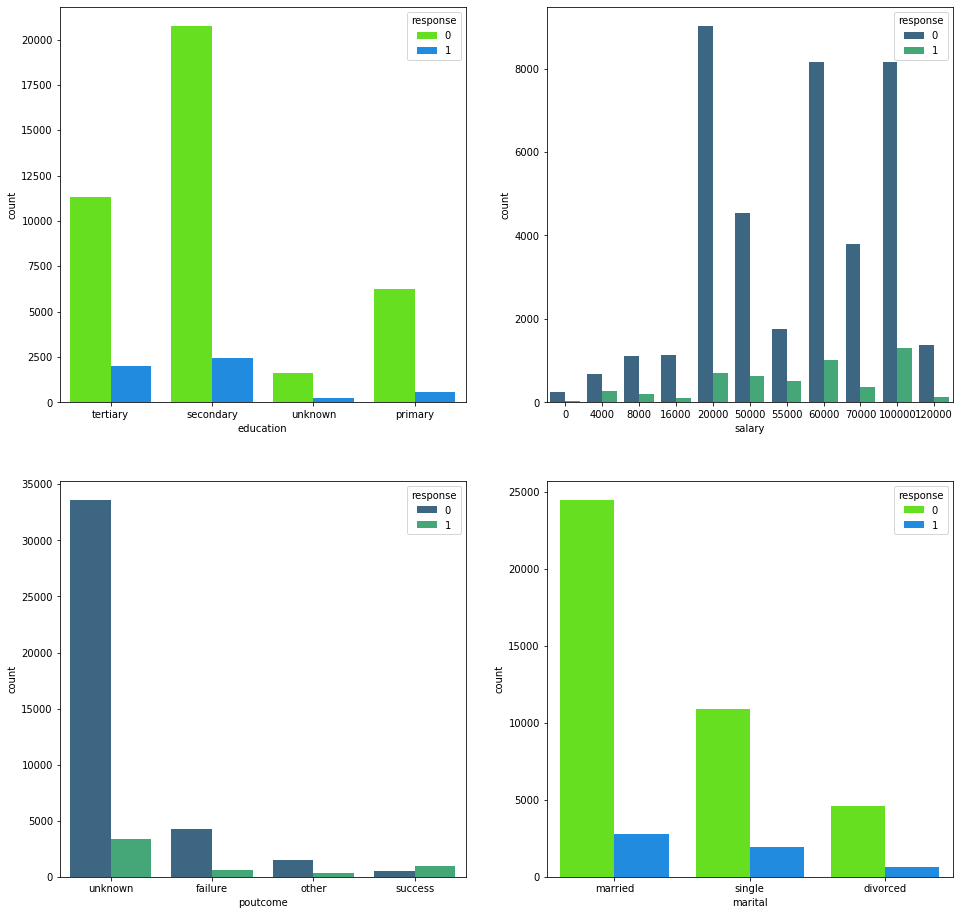

In [322]:
fig ,ax = plt.subplots(2,2,figsize=(16,16))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.countplot(data=bank2,x='education',hue='response',palette='gist_rainbow',ax=ax1)
sns.countplot(data=bank2,x='salary',hue='response',palette='viridis',ax=ax2)
sns.countplot(data=bank2,x='poutcome',hue='response',palette='viridis',ax=ax3)
sns.countplot(data=bank2,x='marital',hue='response',palette='gist_rainbow',ax=ax4)

### Are the features about the previous campaign data useful?

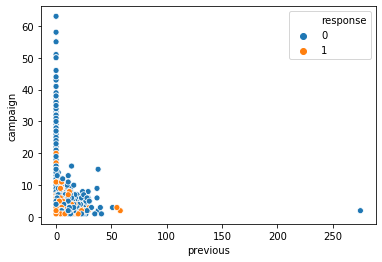

In [323]:
sns.scatterplot(x = 'previous',y='campaign',hue = 'response' ,data=bank2)
plt.show()

previous is maximum the no campaign and minimum is yes there is useful feature because how many is previous campaign.its is best for response varibal.

Are pdays and poutcome associated with the target? 

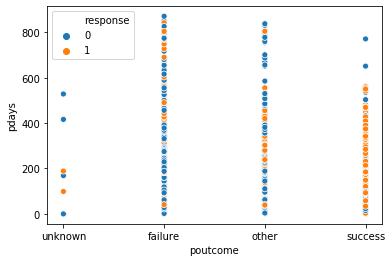

In [324]:
sns.scatterplot(x='poutcome',y='pdays',hue='response',data=bank2)
plt.show()

there are the different type of the poutcome but is most of yes value is in success . then pdays and poutcome is important feature . 

### If yes, and if you plan to use them – how do you handle the pdays column with a value of -1 where the previous campaign data is missing? Explain approach and decision.

yes its is use them then before the -1 value will be replace by the mean and creating the after model . and as well as use the previous campaign varibal .

In [0]:
bank2['pdays'] = bank2['pdays'].replace(-1 , bank2.pdays.mean())

In [326]:
bank2.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,40.197828,0,unknown,0
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,40.197828,0,unknown,0
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,40.197828,0,unknown,0
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,40.197828,0,unknown,0
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,40.197828,0,unknown,0


## Before the predictive modeling part, make sure to perform –

### The necessary transformations for the categorical variables and the numeric variables

drop the jobs column because of the there are more categorical value that why remove that column

In [0]:
bank2 = bank2.drop('job',axis=1)

In [328]:
bank2.head()

,age,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,40.197828,0,unknown,0
1,44,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,40.197828,0,unknown,0
2,33,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,40.197828,0,unknown,0
3,47,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,40.197828,0,unknown,0
4,33,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,40.197828,0,unknown,0


converted categorical into the numerical value

In [0]:
bank2['targeted'] = label_encoder.fit_transform(bank2['targeted'])

In [0]:
bank2['default'] = label_encoder.fit_transform(bank2['default'])

In [0]:
bank2['housing'] = label_encoder.fit_transform(bank2['housing'])

In [0]:
bank2['loan'] = label_encoder.fit_transform(bank2['loan'])

In [0]:
bank2 = bank2.drop('month',axis=1)


In [0]:
training = pd.get_dummies(bank2 ,columns = ['marital','education','contact','poutcome'])

In [0]:
bank2 = training

In [0]:
bank2 = bank2.drop('education_unknown',axis=1)

In [0]:
bank2 = bank2.drop('contact_unknown',axis=1)

In [0]:
bank2 = bank2.drop('poutcome_unknown',axis=1)

In [339]:
bank2.head()

,age,salary,targeted,default,balance,housing,loan,day,duration,campaign,pdays,previous,response,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,58,100000,1,0,2143,1,0,5,261,1,40.197828,0,0,0,1,0,0,0,1,0,0,0,0,0
1,44,60000,1,0,29,1,0,5,151,1,40.197828,0,0,0,0,1,0,1,0,0,0,0,0,0
2,33,120000,1,0,2,1,1,5,76,1,40.197828,0,0,0,1,0,0,1,0,0,0,0,0,0
3,47,20000,0,0,1506,1,0,5,92,1,40.197828,0,0,0,1,0,0,0,0,0,0,0,0,0
4,33,0,0,0,1,0,0,5,198,1,40.197828,0,0,0,0,1,0,0,0,0,0,0,0,0


### Handle variables corresponding to the previous campaign

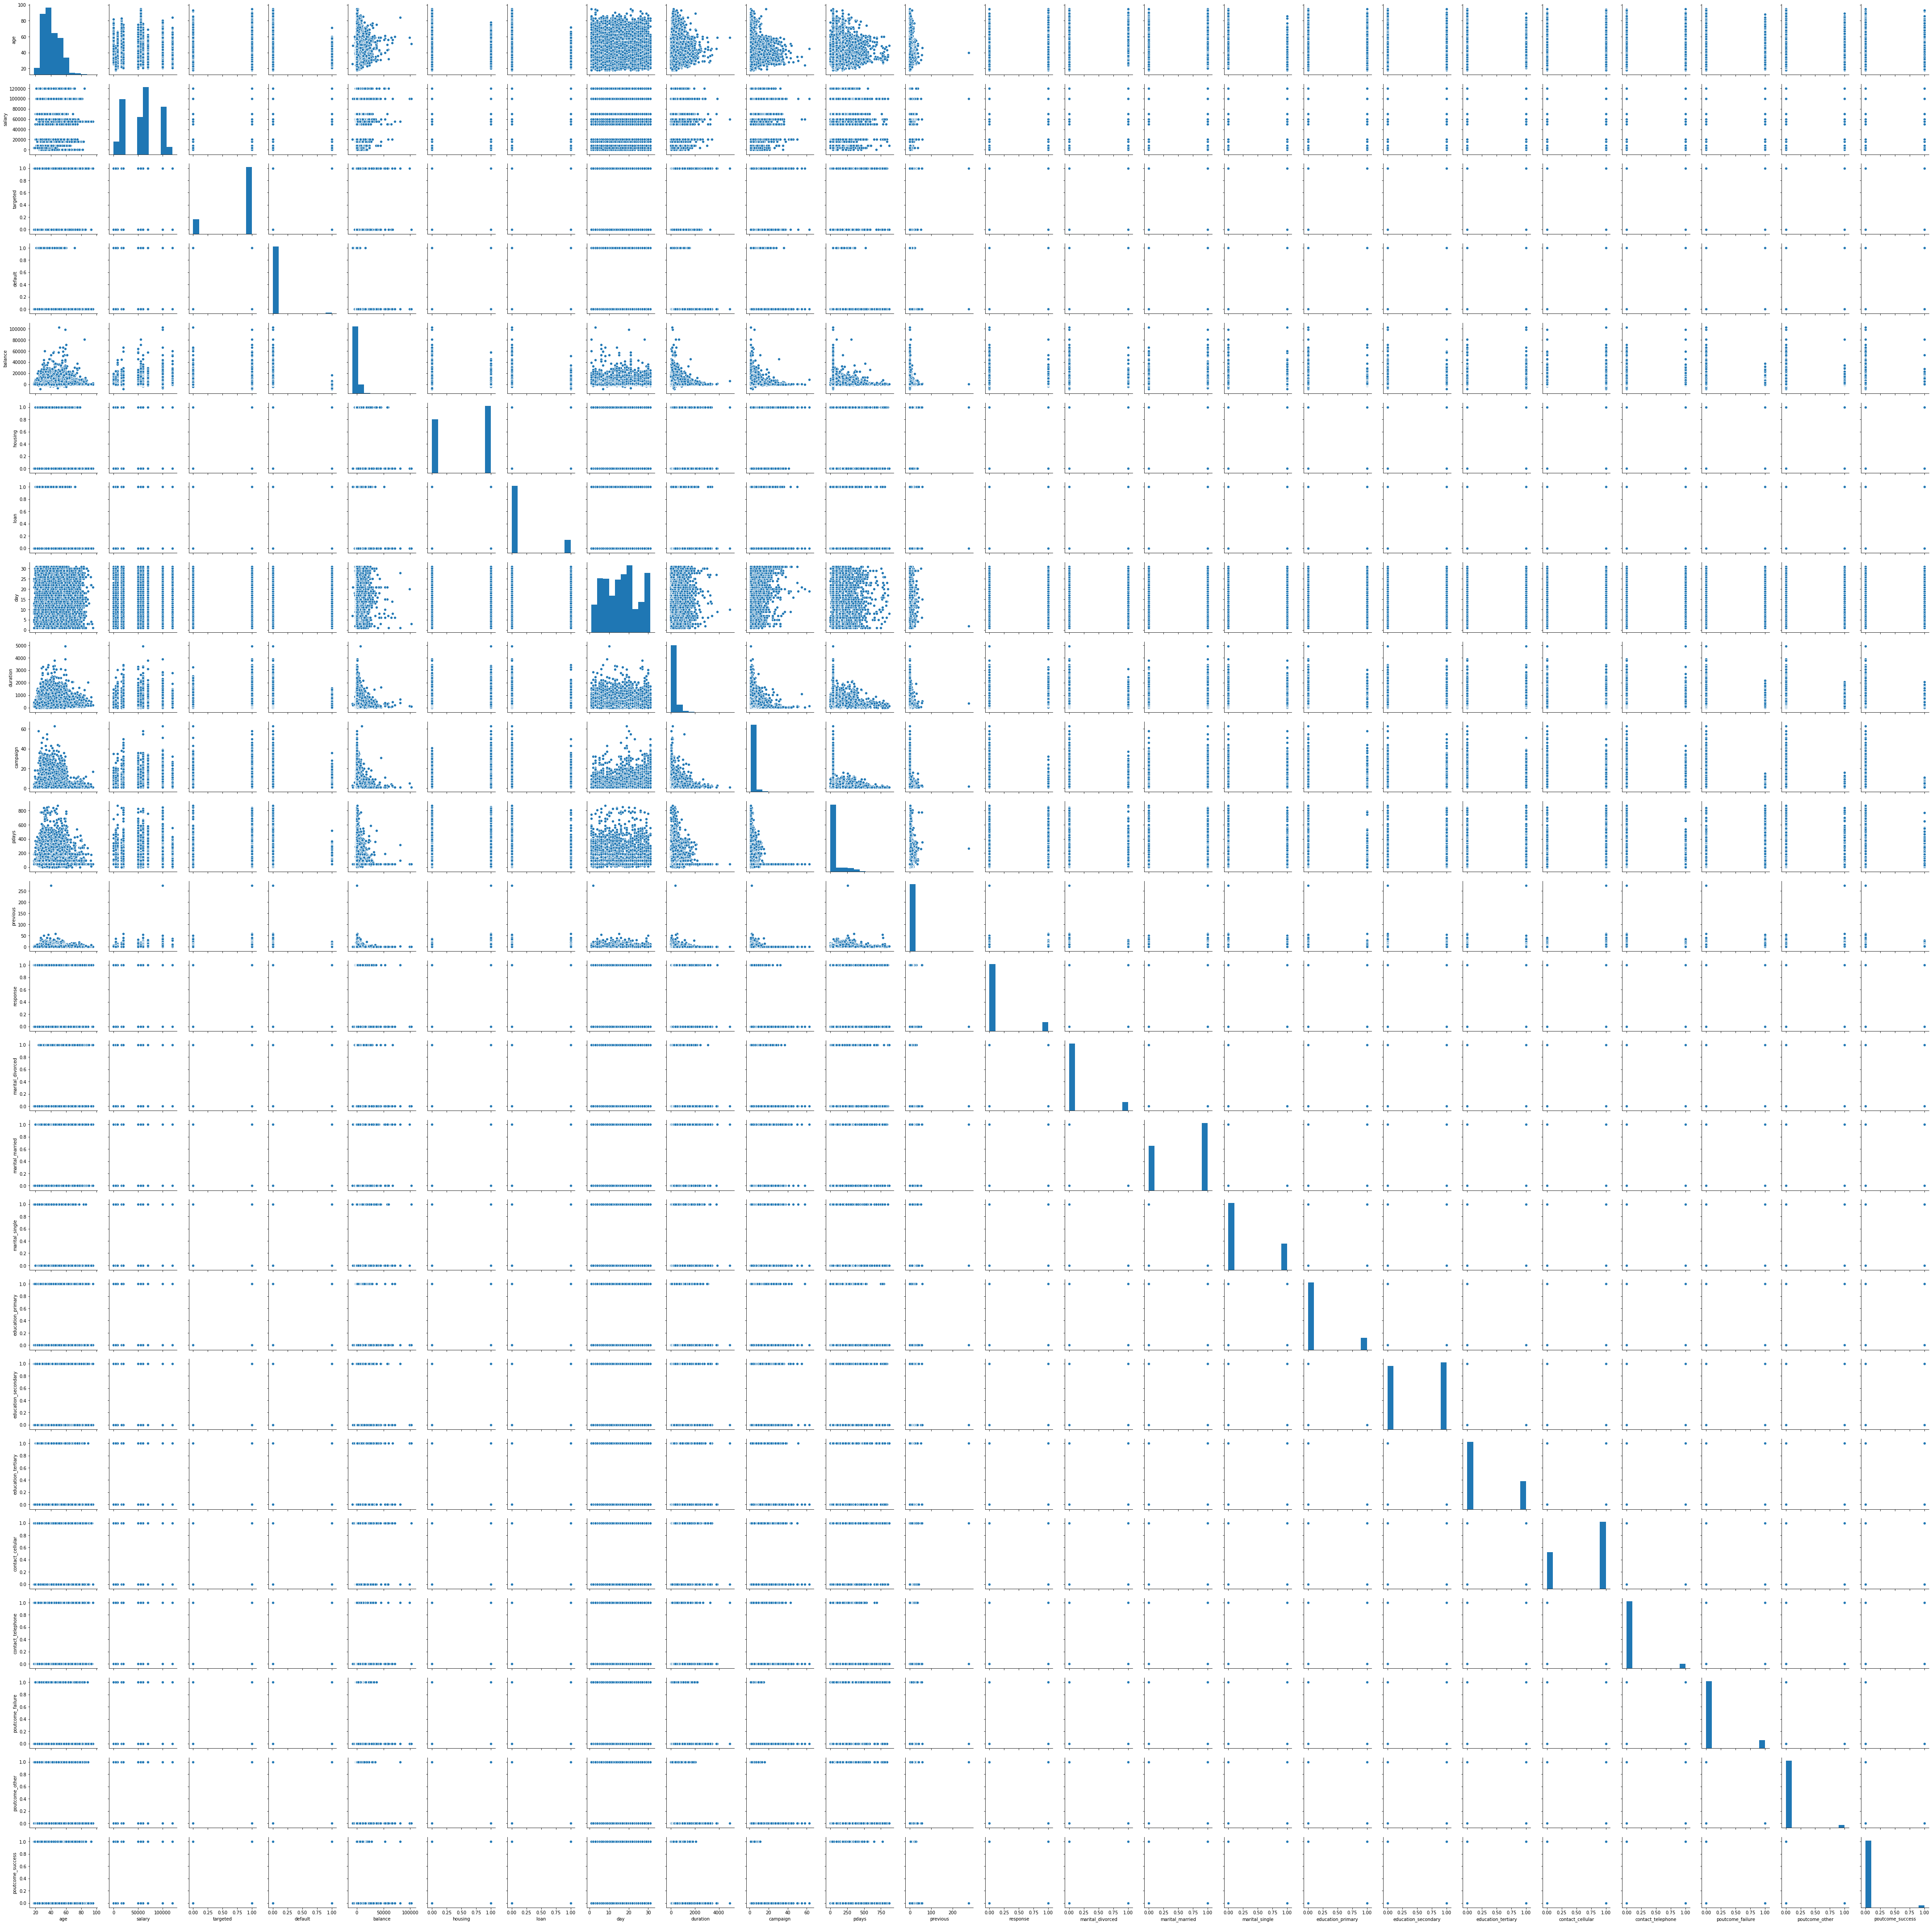

In [340]:
sns.pairplot(bank2)
plt.show()

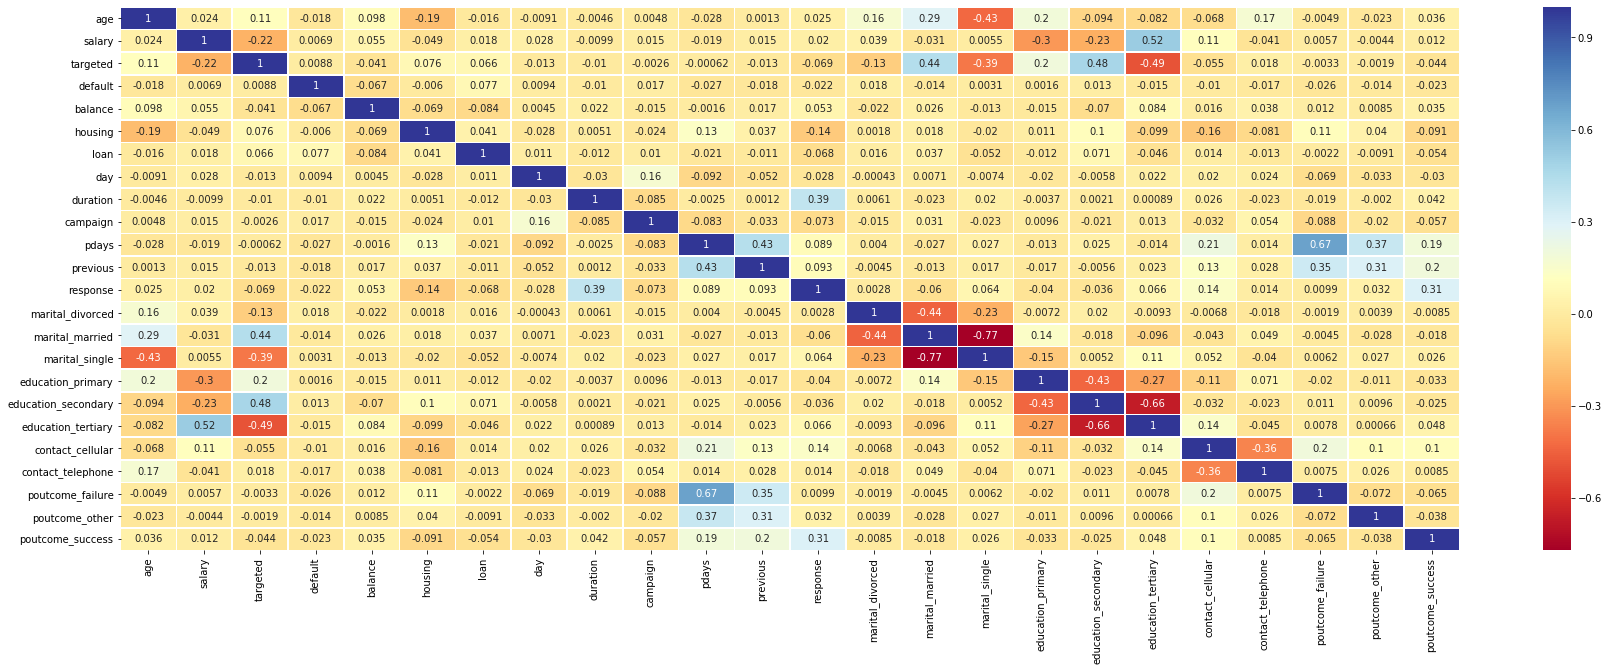

In [341]:
plt.figure(figsize=(30,10))
sns.heatmap(bank2.corr(),annot = True,cmap = 'RdYlBu',linewidths=0.5)
plt.show()

there are different varibal but use for duration because gives the best value for prediction on the response.

# Train test split

In [342]:
bank2.columns

Index(['age', 'salary', 'targeted', 'default', 'balance', 'housing', 'loan',
       'day', 'duration', 'campaign', 'pdays', 'previous', 'response',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'contact_cellular', 'contact_telephone', 'poutcome_failure',
       'poutcome_other', 'poutcome_success'],
      dtype='object')

In [0]:
x2 = bank2.drop('response',axis=True)
y2 = bank2['response']

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x3_train ,x3_test ,y3_train , y3_test = train_test_split(x2,y2,test_size=0.3,random_state=0)

In [346]:
x3_train.shape , x3_test.shape

((31647, 23), (13564, 23))

In [347]:
y3_train.shape , y3_test.shape

((31647,), (13564,))

# Predictive model 1: Logistic regression

### Make a predictive model using logistic regression

using the label_encoding with logistic regression.

In [0]:
# x3_train = x3_train.reshape(-1, 1)
# y3_train = y3_train.reshape(-1, 1) 
# x3_test = x3_test.reshape(-1, 1)
# y3_test = y3_test.reshape(-1, 1) 

In [349]:
bank2.head()

,age,salary,targeted,default,balance,housing,loan,day,duration,campaign,pdays,previous,response,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,58,100000,1,0,2143,1,0,5,261,1,40.197828,0,0,0,1,0,0,0,1,0,0,0,0,0
1,44,60000,1,0,29,1,0,5,151,1,40.197828,0,0,0,0,1,0,1,0,0,0,0,0,0
2,33,120000,1,0,2,1,1,5,76,1,40.197828,0,0,0,1,0,0,1,0,0,0,0,0,0
3,47,20000,0,0,1506,1,0,5,92,1,40.197828,0,0,0,1,0,0,0,0,0,0,0,0,0
4,33,0,0,0,1,0,0,5,198,1,40.197828,0,0,0,0,1,0,0,0,0,0,0,0,0


In [0]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [351]:
log_reg.fit(x3_train,y3_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [352]:
log_reg.intercept_ ,log_reg.coef_

(array([-0.03970269]),
 array([[-5.04506474e-02, -5.15146615e-06, -5.04666781e-02,
         -2.62686395e-03,  4.47430758e-05, -9.55246818e-02,
         -2.65880106e-02, -2.61348204e-02,  3.21895360e-03,
         -1.30142879e-01,  5.99132590e-04,  7.50979029e-02,
          3.96765592e-03, -2.71258859e-02, -1.65444551e-02,
         -1.45780673e-02, -4.44361609e-02,  1.85937783e-02,
          2.44435258e-02,  5.31596177e-03, -8.88656461e-03,
         -1.09906281e-03,  4.45883642e-02]]))

In [0]:
y_pred = log_reg.predict(x3_train)
y_pred1 =log_reg.predict(x3_test)

In [354]:
log_reg.score(x3_train, y3_train)

0.8889626188896262

In [355]:
log_reg.score(x3_test,y3_test)

0.8856531996461221

In [356]:
pred_prob = log_reg.predict_proba(x3_train)
pred_prob

array([[0.96905396, 0.03094604],
       [0.95913192, 0.04086808],
       [0.94014445, 0.05985555],
       ...,
       [0.88332112, 0.11667888],
       [0.98573601, 0.01426399],
       [0.9481315 , 0.0518685 ]])

In [357]:
from sklearn.metrics import r2_score
r2_score(y3_train,y_pred)

-0.07698334843170396

###Use RFE to select top n features in an automated fashion (choose n as you see fit)

In [0]:
import statsmodels.api as sm
x_train_sm1 = sm.add_constant(x3_train)

In [359]:
log_r_sm1 = sm.OLS(y3_train,x_train_sm1).fit()
log_r_sm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     554.3
Date:                Fri, 03 Jan 2020   Prob (F-statistic):               0.00
Time:                        18:25:19   Log-Likelihood:                -3792.5
No. Observations:               31647   AIC:                             7631.
Df Residuals:                   31624   BIC:                             7823.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0208      0.009     -2.273      0.023      -0.039      -0.003
age                     0.0006      0.000      3.514      0.000       0.000       0.001
salary              -1.712e-07   5.78e-08     -2.961      0.003   -2.85e-07   -5.79e-08
targeted               -0.0076      0.007     -1.106      0.269      -0.021       0.006
default                -0.0148      0.012     -1.269      0.204      -0.038       0.008
balance              2.247e-06   5.01e-07      4.482      0.000    1.26e-06    3.23e-06
housing                -0.0614      0.003    -18.432      0.000      -0.068      -0.055
loan                   -0.0352      0.004     -8.322      0.000      -0.044      -0.027
day                    -0.0003      0.000     -1.752      0.080      -0.001     3.9e-05
duration                0.0005      6e-06     80.160      0.000       0.000       0.000
campaign               -0.0021      0.001     -4.144      0.000      -0.003      -0.001
pdays               -4.702e-05   3.24e-05     -1.451      0.147      -0.000    1.65e-05
previous                0.0011      0.001      1.490      0.136      -0.000       0.003
marital_divorced       -0.0077      0.005     -1.511      0.131      -0.018       0.002
marital_married        -0.0223      0.004     -5.524      0.000      -0.030      -0.014
marital_single          0.0092      0.004      2.557      0.011       0.002       0.016
education_primary      -0.0118      0.011     -1.087      0.277      -0.033       0.010
education_secondary     0.0012      0.011      0.114      0.910      -0.020       0.022
education_tertiary      0.0161      0.009      1.731      0.083      -0.002       0.034
contact_cellular        0.0603      0.004     16.127      0.000       0.053       0.068
contact_telephone       0.0537      0.007      7.783      0.000       0.040       0.067
poutcome_failure        0.0295      0.009      3.455      0.001       0.013       0.046
poutcome_other          0.0518      0.010      4.949      0.000       0.031       0.072
poutcome_success        0.4868      0.010     49.032      0.000       0.467       0.506
==============================================================================
Omnibus:                    10011.245   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35158.724
Skew:                           1.586   Prob(JB):                         0.00
Kurtosis:                       7.075   Cond. No.                     3.16e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.36e-27. This might indicate that there are
strong multicollinearity problems or that the design m

In [0]:
from sklearn.feature_selection import RFE

In [0]:
rfe = RFE(log_reg,20)

In [362]:
rfe.fit(x3_train,y3_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='warn', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=20, step=1, verbose=0)

In [363]:
feast =x3_train.columns[rfe.support_]
feast

Index(['age', 'targeted', 'default', 'housing', 'loan', 'day', 'duration',
       'campaign', 'previous', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'contact_cellular', 'contact_telephone',
       'poutcome_failure', 'poutcome_other', 'poutcome_success'],
      dtype='object')

In [0]:
x_train_sm2 = sm.add_constant(x3_train[feast])

In [0]:
lor_sm = sm.OLS(y3_train , x_train_sm2).fit()

In [366]:
lor_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     639.6
Date:                Fri, 03 Jan 2020   Prob (F-statistic):               0.00
Time:                        18:25:20   Log-Likelihood:                -3808.1
No. Observations:               31647   AIC:                             7656.
Df Residuals:                   31627   BIC:                             7823.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0265      0.009     -2.946      0.003      -0.044      -0.009
age                     0.0006      0.000      3.722      0.000       0.000       0.001
targeted               -0.0080      0.007     -1.163      0.245      -0.021       0.005
default                -0.0183      0.012     -1.572      0.116      -0.041       0.005
housing                -0.0627      0.003    -18.920      0.000      -0.069      -0.056
loan                   -0.0371      0.004     -8.785      0.000      -0.045      -0.029
day                    -0.0003      0.000     -1.713      0.087      -0.001    4.64e-05
duration                0.0005      6e-06     80.241      0.000       0.000       0.000
campaign               -0.0022      0.001     -4.273      0.000      -0.003      -0.001
previous                0.0011      0.001      1.483      0.138      -0.000       0.002
marital_divorced       -0.0105      0.005     -2.083      0.037      -0.020      -0.001
marital_married        -0.0239      0.004     -5.959      0.000      -0.032      -0.016
marital_single          0.0079      0.004      2.215      0.027       0.001       0.015
education_primary      -0.0096      0.011     -0.885      0.376      -0.031       0.012
education_secondary     0.0010      0.011      0.098      0.922      -0.020       0.022
education_tertiary      0.0114      0.009      1.260      0.208      -0.006       0.029
contact_cellular        0.0599      0.004     16.015      0.000       0.053       0.067
contact_telephone       0.0545      0.007      7.900      0.000       0.041       0.068
poutcome_failure        0.0206      0.006      3.677      0.000       0.010       0.032
poutcome_other          0.0438      0.008      5.156      0.000       0.027       0.060
poutcome_success        0.4823      0.009     53.354      0.000       0.465       0.500
==============================================================================
Omnibus:                    10037.121   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35295.818
Skew:                           1.590   Prob(JB):                         0.00
Kurtosis:                       7.082   Cond. No.                     1.46e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.98e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### 	Using p values and VIF, get rid of the redundant features

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [368]:
x3_train.head()

,age,salary,targeted,default,balance,housing,loan,day,duration,campaign,pdays,previous,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
24951,58,100000,1,0,1021,0,0,18,205,1,40.197828,0,0,1,0,1,0,0,0,0,0,0,0
22129,55,20000,0,0,196,0,0,21,168,2,40.197828,0,0,1,0,0,0,0,1,0,0,0,0
986,50,50000,1,0,159,1,0,7,216,2,40.197828,0,0,1,0,0,1,0,0,0,0,0,0
14999,43,100000,1,0,1880,1,0,17,63,6,40.197828,0,0,1,0,1,0,0,1,0,0,0,0
4027,53,60000,0,0,647,1,0,16,512,6,40.197828,0,1,0,0,0,0,1,0,0,0,0,0


In [369]:
variance_inflation_factor(x3_train.values, 10)

3.337286842069195

In [370]:
[variance_inflation_factor(x3_train.values, ind) for ind in range(11)]

[1.3938089466285246,
 1.4630547473490942,
 2.9577629148843587,
 1.0115454779016226,
 1.0366673697008784,
 1.1627735175400318,
 1.027330802690601,
 1.0387721293629544,
 1.0121595054656018,
 1.0508730097679035,
 3.337286842069195]

In [371]:
vif = pd.DataFrame()
vif['Features'] = x3_train.columns
vif['VIF'] = [variance_inflation_factor(x3_train.values, i) for i in range(x3_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,marital_married,39.69
14,marital_single,16.59
16,education_secondary,11.89
12,marital_divorced,8.94
17,education_tertiary,7.65
15,education_primary,6.46
10,pdays,3.34
20,poutcome_failure,3.00
2,targeted,2.96
21,poutcome_other,1.82


use this value and remove that is maximum p value.

In [0]:
import statsmodels.api as sm

In [373]:
x3_train.head()

,age,salary,targeted,default,balance,housing,loan,day,duration,campaign,pdays,previous,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
24951,58,100000,1,0,1021,0,0,18,205,1,40.197828,0,0,1,0,1,0,0,0,0,0,0,0
22129,55,20000,0,0,196,0,0,21,168,2,40.197828,0,0,1,0,0,0,0,1,0,0,0,0
986,50,50000,1,0,159,1,0,7,216,2,40.197828,0,0,1,0,0,1,0,0,0,0,0,0
14999,43,100000,1,0,1880,1,0,17,63,6,40.197828,0,0,1,0,1,0,0,1,0,0,0,0
4027,53,60000,0,0,647,1,0,16,512,6,40.197828,0,1,0,0,0,0,1,0,0,0,0,0


In [374]:
X_train_sm = sm.add_constant(x3_train)
X_train_sm.head()

,const,age,salary,targeted,default,balance,housing,loan,day,duration,campaign,pdays,previous,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
24951,1.0,58,100000,1,0,1021,0,0,18,205,1,40.197828,0,0,1,0,1,0,0,0,0,0,0,0
22129,1.0,55,20000,0,0,196,0,0,21,168,2,40.197828,0,0,1,0,0,0,0,1,0,0,0,0
986,1.0,50,50000,1,0,159,1,0,7,216,2,40.197828,0,0,1,0,0,1,0,0,0,0,0,0
14999,1.0,43,100000,1,0,1880,1,0,17,63,6,40.197828,0,0,1,0,1,0,0,1,0,0,0,0
4027,1.0,53,60000,0,0,647,1,0,16,512,6,40.197828,0,1,0,0,0,0,1,0,0,0,0,0


In [0]:
log = sm.OLS(y3_train, X_train_sm).fit()

In [376]:
log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     554.3
Date:                Fri, 03 Jan 2020   Prob (F-statistic):               0.00
Time:                        18:25:24   Log-Likelihood:                -3792.5
No. Observations:               31647   AIC:                             7631.
Df Residuals:                   31624   BIC:                             7823.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0208      0.009     -2.273      0.023      -0.039      -0.003
age                     0.0006      0.000      3.514      0.000       0.000       0.001
salary              -1.712e-07   5.78e-08     -2.961      0.003   -2.85e-07   -5.79e-08
targeted               -0.0076      0.007     -1.106      0.269      -0.021       0.006
default                -0.0148      0.012     -1.269      0.204      -0.038       0.008
balance              2.247e-06   5.01e-07      4.482      0.000    1.26e-06    3.23e-06
housing                -0.0614      0.003    -18.432      0.000      -0.068      -0.055
loan                   -0.0352      0.004     -8.322      0.000      -0.044      -0.027
day                    -0.0003      0.000     -1.752      0.080      -0.001     3.9e-05
duration                0.0005      6e-06     80.160      0.000       0.000       0.000
campaign               -0.0021      0.001     -4.144      0.000      -0.003      -0.001
pdays               -4.702e-05   3.24e-05     -1.451      0.147      -0.000    1.65e-05
previous                0.0011      0.001      1.490      0.136      -0.000       0.003
marital_divorced       -0.0077      0.005     -1.511      0.131      -0.018       0.002
marital_married        -0.0223      0.004     -5.524      0.000      -0.030      -0.014
marital_single          0.0092      0.004      2.557      0.011       0.002       0.016
education_primary      -0.0118      0.011     -1.087      0.277      -0.033       0.010
education_secondary     0.0012      0.011      0.114      0.910      -0.020       0.022
education_tertiary      0.0161      0.009      1.731      0.083      -0.002       0.034
contact_cellular        0.0603      0.004     16.127      0.000       0.053       0.068
contact_telephone       0.0537      0.007      7.783      0.000       0.040       0.067
poutcome_failure        0.0295      0.009      3.455      0.001       0.013       0.046
poutcome_other          0.0518      0.010      4.949      0.000       0.031       0.072
poutcome_success        0.4868      0.010     49.032      0.000       0.467       0.506
==============================================================================
Omnibus:                    10011.245   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35158.724
Skew:                           1.586   Prob(JB):                         0.00
Kurtosis:                       7.075   Cond. No.                     3.16e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.36e-27. This might indicate that there are
strong multicollinearity problems or that the design m

In [377]:
vif = pd.DataFrame()
vif['Features'] = x3_train.columns
vif['VIF'] = [variance_inflation_factor(x3_train.values, i) for i in range(x3_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 10)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,marital_married,39.688397
14,marital_single,16.586030
16,education_secondary,11.891523
12,marital_divorced,8.943384
17,education_tertiary,7.647525
15,education_primary,6.462002
10,pdays,3.337287
20,poutcome_failure,2.996788
2,targeted,2.957763
21,poutcome_other,1.815286


In [0]:
X_train_sm = sm.add_constant(x3_train[["duration","default","loan","balance","housing","campaign","day","contact_telephone","previous","age","salary","poutcome_other"]])

In [0]:
log1 = sm.OLS(y3_train, X_train_sm).fit()

In [380]:
log1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     645.9
Date:                Fri, 03 Jan 2020   Prob (F-statistic):               0.00
Time:                        18:25:26   Log-Likelihood:                -5485.5
No. Observations:               31647   AIC:                         1.100e+04
Df Residuals:                   31634   BIC:                         1.111e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0527      0.009      6.110      0.000       0.036       0.070
duration              0.0005   6.32e-06     78.743      0.000       0.000       0.001
default              -0.0312      0.012     -2.544      0.011      -0.055      -0.007
loan                 -0.0469      0.004    -10.561      0.000      -0.056      -0.038
balance            3.183e-06   5.27e-07      6.041      0.000    2.15e-06    4.22e-06
housing              -0.0923      0.003    -27.663      0.000      -0.099      -0.086
campaign             -0.0039      0.001     -7.178      0.000      -0.005      -0.003
day                  -0.0004      0.000     -1.936      0.053      -0.001    4.67e-06
contact_telephone     0.0096      0.007      1.439      0.150      -0.003       0.023
previous              0.0112      0.001     16.177      0.000       0.010       0.013
age                  -0.0001      0.000     -0.914      0.361      -0.000       0.000
salary             1.062e-07   5.07e-08      2.095      0.036    6.82e-09    2.05e-07
poutcome_other        0.0066      0.009      0.768      0.443      -0.010       0.023
==============================================================================
Omnibus:                    10608.856   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36979.765
Skew:                           1.694   Prob(JB):                         0.00
Kurtosis:                       7.071   Cond. No.                     4.97e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [381]:
vif = pd.DataFrame()
vif['Features'] = x3_train[["duration","default","loan","balance","housing","campaign","day","contact_telephone","previous","age","salary","poutcome_other"]].columns
vif['VIF'] = [variance_inflation_factor(x3_train.values, i) for i in range(x3_train[["duration","default","loan","balance","housing","campaign","day","contact_telephone",
                                                                                     "previous","age","salary","poutcome_other"]].shape[1])]
vif['VIF'] = round(vif['VIF'], 10)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,salary,3.337287
2,loan,2.957763
1,default,1.463055
0,duration,1.393809
11,poutcome_other,1.353892
5,campaign,1.162774
9,age,1.050873
7,contact_telephone,1.038772
4,housing,1.036667
6,day,1.027331


its on the adding the varibal get more varibal added then get best result . and check the p-value as well vif factor of each varibal and it is maximum p value then remove that varibal .

### Estimate the model performance using k fold cross validation

In [382]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=10,shuffle=True)
cv_score =[]
i=1
for train_index,test_index in kf.split(x2,y2):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = x2.loc[train_index],x2.loc[test_index]
    ytr,yvl = y2.loc[train_index],y2.loc[test_index]
    lr = LogisticRegression(C=2)
    lr.fit(xtr,ytr)
    score = roc_auc_score(yvl,lr.predict(xvl))
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test = lr.predict_proba(x3_test)[:,1]
    pred_test_full =pred_test
    i+=1    

  

1 of KFold 10
ROC AUC score: 0.562430141215937
2 of KFold 10
ROC AUC score: 0.5890324608707961
3 of KFold 10
ROC AUC score: 0.5646943698360805
4 of KFold 10
ROC AUC score: 0.5668468316595384
5 of KFold 10
ROC AUC score: 0.58473681768073
6 of KFold 10
ROC AUC score: 0.5776763830117703
7 of KFold 10
ROC AUC score: 0.5658332259983105
8 of KFold 10
ROC AUC score: 0.6112818737664364
9 of KFold 10
ROC AUC score: 0.5727568085130563
10 of KFold 10
ROC AUC score: 0.5609172891237019


k -fold cross validation for logistics regression . its is selected for k=10 then good accuracy of the model.

###What is the precision, recall, accuracy of your model?

In [383]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix 
print('Confusion matrix_training:\n', confusion_matrix(y3_train, y_pred))
print('Confusion matrix_test:\n', confusion_matrix(y3_test, y_pred1))

Confusion matrix_training:
 [[27529   424]
 [ 3090   604]]
Confusion matrix_test:
 [[11768   201]
 [ 1350   245]]


In [384]:
from sklearn.metrics import classification_report
print(classification_report(y3_train,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     27953
           1       0.59      0.16      0.26      3694

    accuracy                           0.89     31647
   macro avg       0.74      0.57      0.60     31647
weighted avg       0.86      0.89      0.86     31647



there is seen the true positive rate recall is more then reponse will depends on pdays as well as poutcome and false positive rate is theshold the values .

response is maximum the no to all varibale is f1_score value is more and only is 0.26 value is yes. 

###Which features are the most important from your model?

there is model target varibal is reponse then the there are many varibal but is more important feature is duration because of customer take the loan then how many duration return the loan.and also the salary and age and education this are also important to response to take loan or not.salary is minimum to get response is no maximum time. and also age is more than 50 then response is no.above all feature is important to get response of loan.

**and pdays and previous is important factor for the response to yes and no  contact telephone , celluer abd  poutcome is success or failure but maximum is success and pdays and previous are more value other than response is yes or no its is depends in the above varibal.**

## Predictive model 2: Random Forest

### Make a predictive model using random forest technique

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
ra_for = RandomForestClassifier(n_estimators=100,oob_score=True,max_features=7)

In [387]:
ra_for.fit(x3_train,y3_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [388]:
ra_for.score(x3_train,y3_train)

1.0

In [389]:
ra_for.score(x3_test,y3_test)


0.8984812739604836

In [0]:
y_pred_rf = ra_for.predict(x3_train)

In [391]:
y_pred_rf

array([0, 0, 0, ..., 1, 0, 0])

In [0]:
y_pred_rf1 = ra_for.predict(x3_test)

In [393]:
y_pred_rf1

array([0, 1, 0, ..., 0, 0, 0])

In [394]:
r2_score(y3_train,y_pred_rf)

1.0

its is training dataset accuracy

In [395]:
r2_score(y3_test,y_pred_rf1)

0.021629910707153366

its is test dataset accuracy 

###Use not more than 50 trees, and control the depth of the trees to prevent overfitting

In [0]:
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.externals.six import StringIO  
from IPython.display import Image

In [397]:
ra_for.feature_importances_

array([0.11293902, 0.05083634, 0.00939107, 0.00185016, 0.12427628,
       0.02187056, 0.01046521, 0.09708914, 0.30457368, 0.04107688,
       0.04617619, 0.02610437, 0.00701219, 0.00956763, 0.0088556 ,
       0.00705055, 0.01076857, 0.01114008, 0.0150081 , 0.00527335,
       0.00688523, 0.00434038, 0.0674494 ])

In [398]:
ra_for.estimators_[0]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1697435055, splitter='best')

In [399]:
type(ra_for.estimators_[0])

sklearn.tree.tree.DecisionTreeClassifier

In [0]:
rf_tree = ra_for.estimators_[2]

In [0]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

In [407]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
decision_tree =tree.DecisionTreeClassifier(max_depth = 4)
decision_tree.fit(x3_train, y3_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [408]:
y_pred_dt = decision_tree.predict(x3_test)
y_pred_dt

array([0, 1, 0, ..., 0, 0, 0])

In [0]:
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 4,
                              impurity = True,
                              feature_names = list(bank2.drop(['response'], axis=1)),
                              class_names = ['previous','duration','balance' 'response'],
                              rounded = True,
                              filled= True )
 

In [410]:
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

0

In [0]:
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
font = ImageFont.truetype('/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', 26)
draw.text((10, 0),
          '"Title <= bank-marketing', 
          (0,0,255),
          font=font)
img.save('sample-out.png')
PImage("sample-out.png")


### Use not more than 50 trees, and control the depth of the trees to prevent overfitting

Over-fitting is the phenomenon in which the learning system tightly fits the given training data so much that it would be inaccurate in predicting the outcomes of the untrained data.One of the methods used to address over-fitting in decision tree is called pruning which is done after the initial training is complete. In pruning, you trim off the branches of the tree

###Estimate the model performance using k fold cross validation

In [412]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=10,shuffle=True)
cv_score =[]
i=1
for train_index,test_index in kf.split(x2,y2):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = x2.loc[train_index],x2.loc[test_index]
    ytr,yvl = y2.loc[train_index],y2.loc[test_index]
    RF = RandomForestClassifier(n_estimators=100,oob_score=True,max_features=7)
    RF.fit(xtr,ytr)
    score = roc_auc_score(yvl,RF.predict(xvl))
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test = RF.predict(x3_test)
    pred_test_full =pred_test
    i+=1    

1 of KFold 10
ROC AUC score: 0.6788728100262416
2 of KFold 10
ROC AUC score: 0.678109423059352
3 of KFold 10
ROC AUC score: 0.6652603410980751
4 of KFold 10
ROC AUC score: 0.6681527042743332
5 of KFold 10
ROC AUC score: 0.6767845710324241
6 of KFold 10
ROC AUC score: 0.679927435210686
7 of KFold 10
ROC AUC score: 0.6912695902201378
8 of KFold 10
ROC AUC score: 0.6995825298991177
9 of KFold 10
ROC AUC score: 0.6849154357865068
10 of KFold 10
ROC AUC score: 0.6761876024776826


### What is the precision, recall, accuracy of your model?

In [413]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix 
print('Confusion matrix_training:\n', confusion_matrix(y3_train, y_pred_rf))
print('Confusion matrix_test:\n', confusion_matrix(y3_test, y_pred_rf1))



Confusion matrix_training:
 [[27953     0]
 [    0  3694]]
Confusion matrix_test:
 [[11546   423]
 [  954   641]]


In [414]:
from sklearn.metrics import classification_report
print(classification_report(y3_test,y_pred_rf1))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     11969
           1       0.60      0.40      0.48      1595

    accuracy                           0.90     13564
   macro avg       0.76      0.68      0.71     13564
weighted avg       0.89      0.90      0.89     13564



### Using the feature importance values from the Random Forest module, identify the most important features for the model

there are the many feature is in dataset i have used in the 4 feature to get best result its is important feature is duration, poutcome_success and contact cellur is get the best accuracy of the model 

## Compare the performance of the Random Forest and the logistic model – 

-	Evaluate both models on the test set

evaluating the both model best accuracy for both model is give the  test set . as compare to logistic best test_set accuracy random forest.

-	Which metric did you choose and why?

there are different metrics i have used to confusion metrics because of the give precsion as well as recall value.for the how many value is predicted and calculated the f1_score as well as accuracy .

-	Which model has better performance on the test set? 

there is random forest test set is better performance as compare to logistic test set.

-	Compare the feature importance from the different models – do they agree? Are the top features similar in both models?

in there both model is similar feature is the duration , previous , contact cellur three feature get the best result because of there are p value is minium . 